In [49]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score 


### Class
- 1) Alcohol
- 2) Malic acid
- 3) Ash
- 4) Alcalinity of ash
- 5) Magnesium
- 6) Total phenols
- 7) Flavanoids
- 8) Nonflavanoid phenols
- 9) Proanthocyanins
- 10)Color intensity
- 11)Hue
- 12)OD280/OD315 of diluted wines
- 13)Proline


In [26]:
data1 = pd.read_table('/Users/newlife/Desktop/wine.names')
data1[:1000]

,1. Title of Database: Wine recognition data
NaN,"Updated Sept 21, 1998 by C.Blake : Added attri..."
2. Sources:,NaN
"(a) Forina, M. et al, PARVUS - An Extendible Package for Data",NaN
"Exploration, Classification and Correlation. Institute of Pharmaceutical",NaN
"and Food Analysis and Technologies, Via Brigata Salerno,",NaN
...,...
NaN,None
9. Class Distribution: number of instances per class,NaN
,class 1 59
NaN,class 2 71


In [39]:
data = pd.read_csv('/Users/newlife/Desktop/wine.data', header =None, names= list(range(0,14)))
data[:5]
y = data[0]
X = data[range(1,14) ]


## Совместные графики

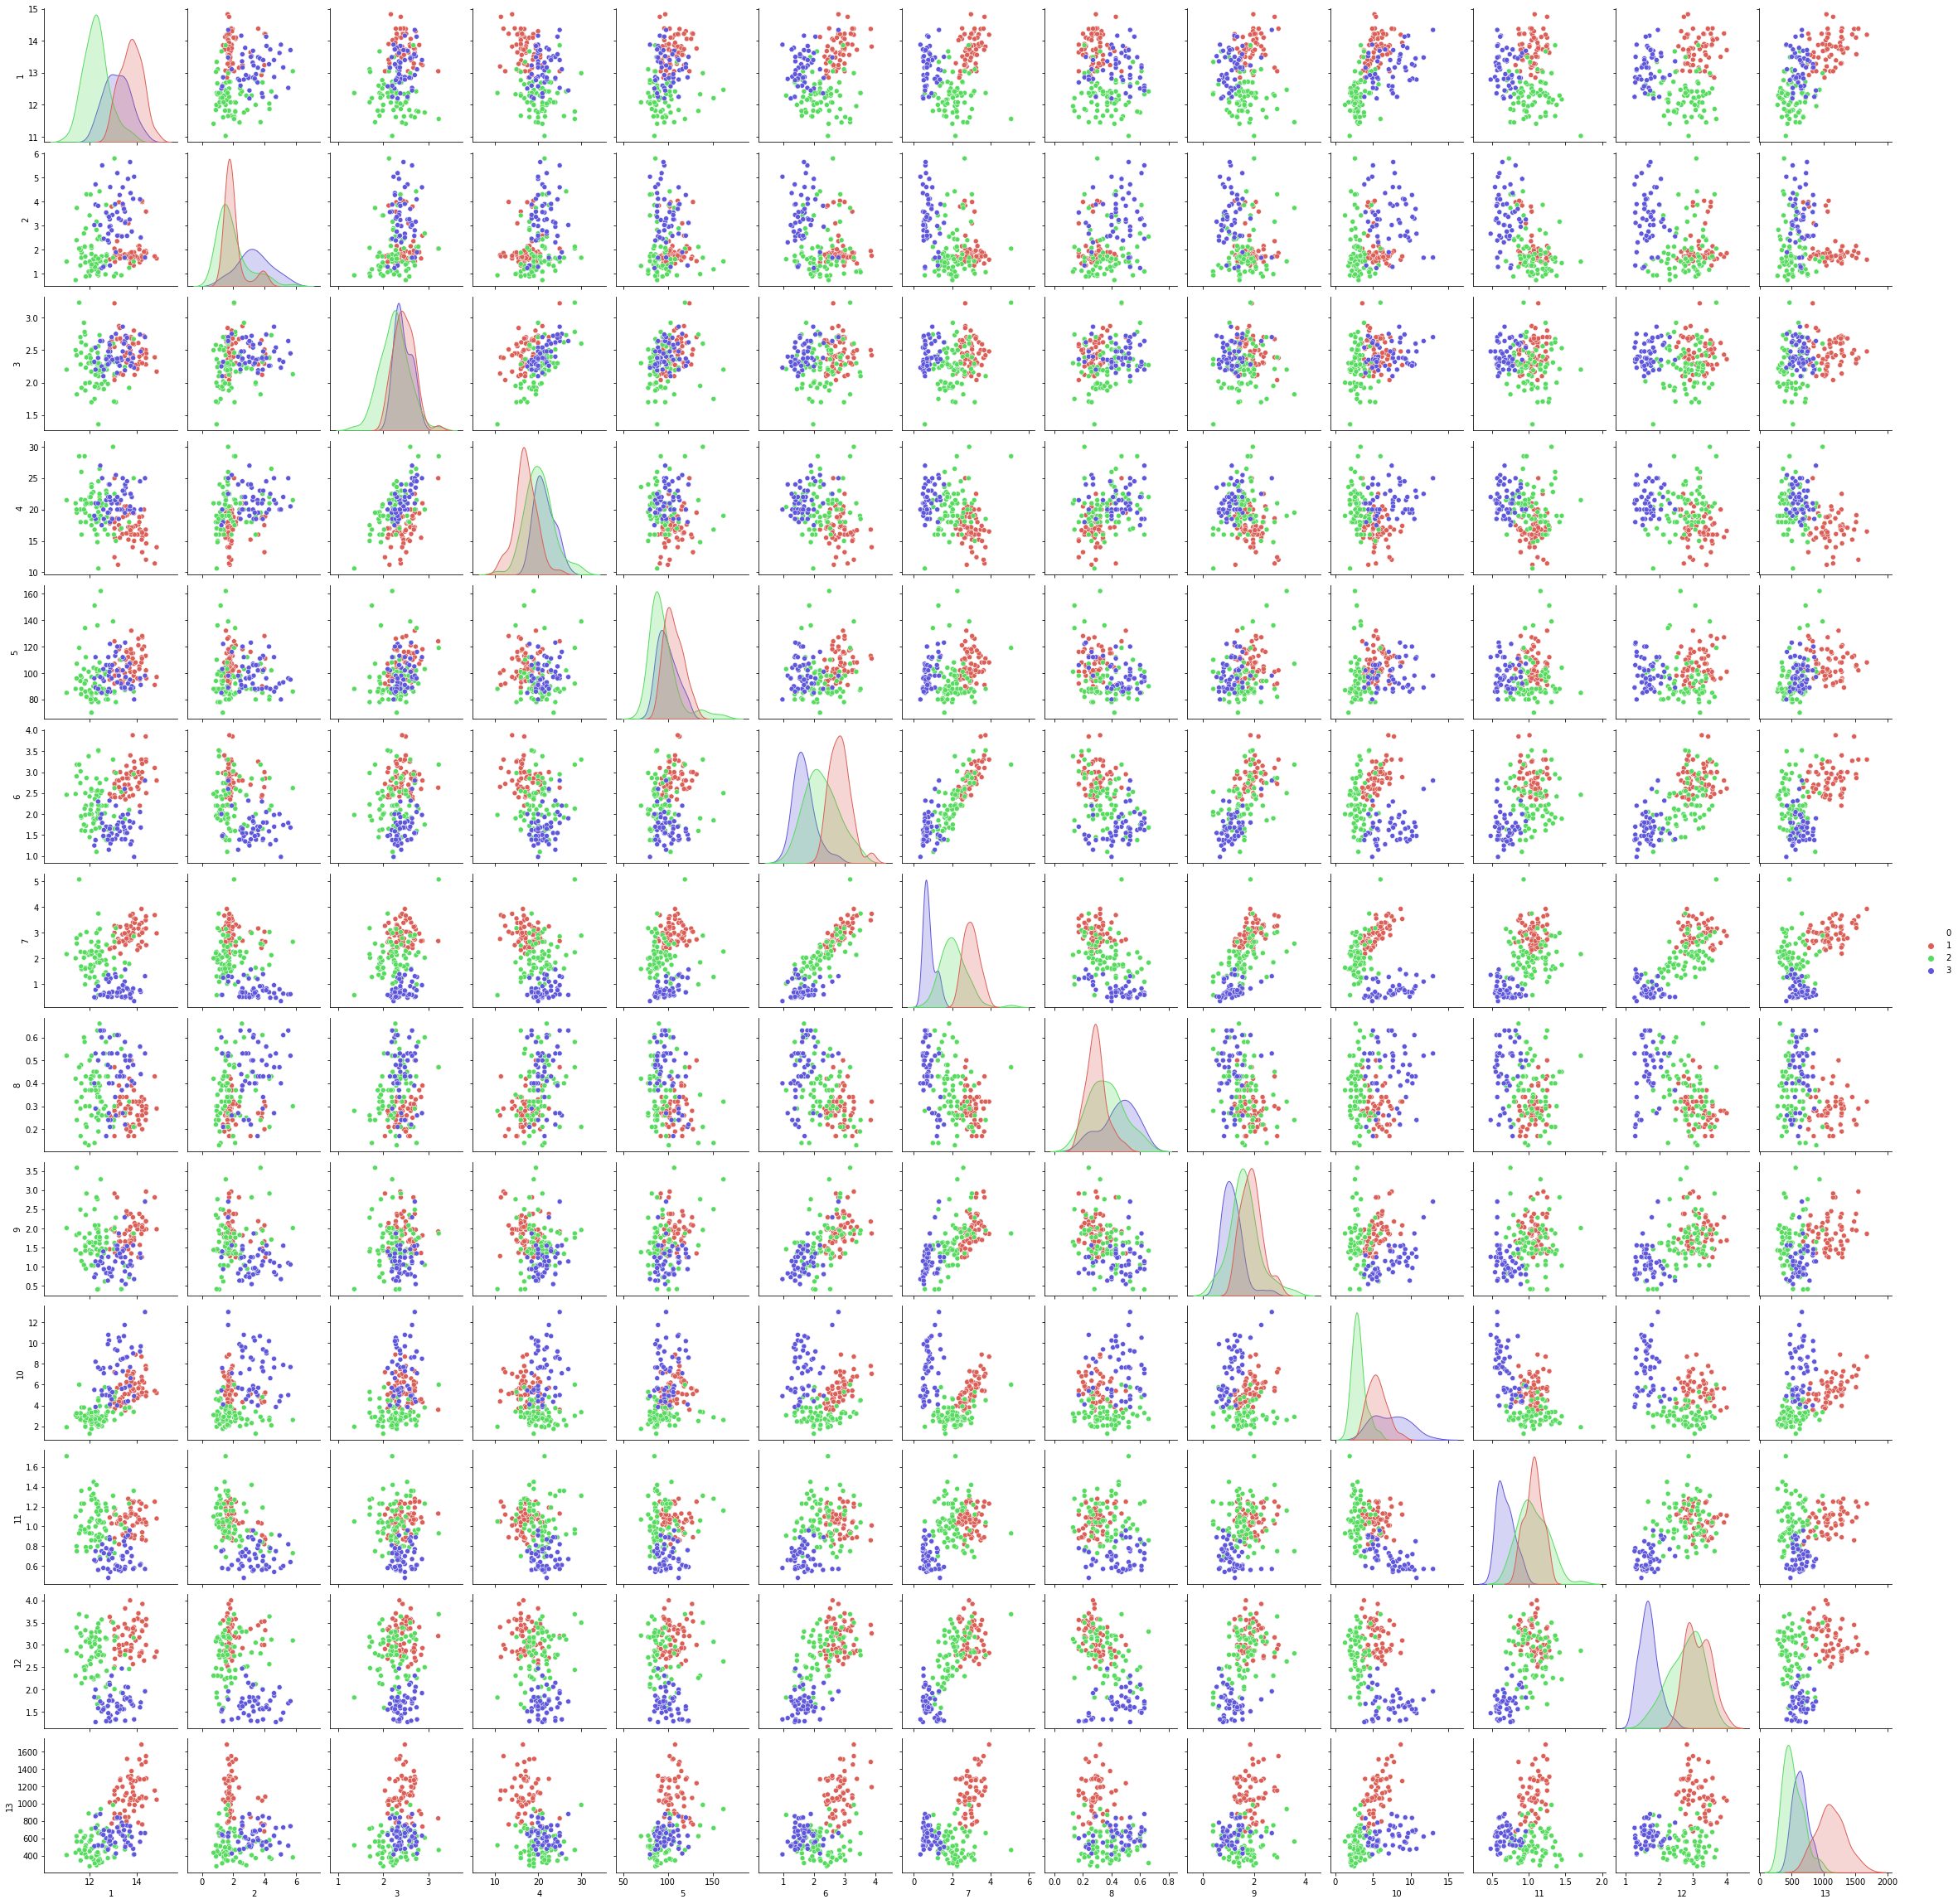

In [4]:
 
sns_plot = sns.pairplot(data[range(14)].dropna(), hue=0, palette=sns.color_palette("hls", 3))
sns_plot

## Разбиваем выборку на 5 частей с помощью kfold определяем лучшее количество соседей без нормировки признаковъ

In [95]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# таким образом можно разбить выборку на тренеровочную и тестовую
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
    
#для 50 соседей проверяем что лучше
kMeans =[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    array = cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')
    m = array.mean()
    kMeans.append(m)

# максимальная точност
m = max(kMeans)
# При каком кол во соседей достигается
index = kMeans.index(m) +1
index

print(m,' ', index)


0.7304761904761905   1


## Нормируем признаки и находим значения количества соседей при них

In [102]:
X_scaled = scale(X)
kMeans =[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled,y)
    array = cross_val_score(estimator=knn, X=X_scaled, y=y, cv=kf, scoring='accuracy')
    m = array.mean()
    kMeans.append(m)

# максимальная точност
m = max(kMeans)
# При каком кол во соседей достигается
index = kMeans.index(m) +1
index

print(m,' ', index)

0.9776190476190475   29


## Задача про стоимость домов, в зависимосте от места нахождения.

In [75]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor

Load = load_boston()
X = scale(Load.data)
y = Load.target



    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollara
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000 dollars

In [76]:
parametr = np.linspace(1,10,200)# делаем разбиение, чтобы брать 200 разных весов
kf = KFold(n_splits=5, shuffle=True, random_state=42) # разбиваем выборку и перемешиваем

# можно сделать так, или как ниже в одну строчку
#means = [];
#for p in parametr:
#    knn = KNeighborsRegressor(n_neighbors=5, weights='distance',metric='minkowski', p=p)
#    knn.fit(X,y)
#    score = cross_val_score(estimator=knn, X=X, y=y, cv=kf  )
#    means.append(round(score.mean(),3))
    




In [80]:
#получаем массив из точностей при разных p
cv_accuracy = [cross_val_score(estimator=KNeighborsRegressor(n_neighbors=5, weights='distance', p=p, metric='minkowski'), X=X, y=y, cv=kf).mean() for p in parametr]


In [86]:
cv_accuracy[:5]

[0.8013825191275472,
 0.7964902267716104,
 0.7970351994890925,
 0.7960441449462369,
 0.7958525038656383]

# Наилучшее p и наилучшая точность

In [85]:
best_res = np.max(cv_accuracy)

i = list(cv_accuracy).index(best_res)
print('best result -', best_res , ' best p for this task -',parametr[i])

best result - 0.8013825191275472  best p for this task - 1.0
